# Regresión Lineal

### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?

In [1]:
lista_alumnos = [("Leonardo S", 24, 1.82), 
                 ("Piero T", 25, 1.71), 
                 ("Marta B", 35, 1.66), 
                 ("Silvia P", 37, 1.63), 
                 ("Faro Z", 29, 1.90), 
                 ("Miguel N", 27, 1.80), 
                 ("Alejandro M", 28, 1.70), 
                 ("Cristina M", 32, 1.60), 
                 ("Francisco P", 36, 1.74), 
                 ("Jorge D", 45, 1.72), 
                 ("Jesús L", 41, 1.65), 
                 ("Marta G", 30, 1.65), 
                 ("Jennifer S", 40, 1.60), 
                 ("Diego I", 39, 1.80), 
                 ("Antonio C", 23, 1.77), 
                 ("Juan M", 32, 1.75), 
                 ("David S", 27, 1.70), 
                 ("Antonio J", 34, 1.80), 
                 ("Carlos H", 27, 1.77), 
                 ("Erik U", 28, 1.70), 
                 ("Marcos L", 35, 1.80)] 

#### 1. Crea un dataframe

In [41]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.DataFrame(lista_alumnos)
df.columns=['Nombre','Edad','Altura']
df.head()

,Nombre,Edad,Altura
0,Leonardo S,24,1.82
1,Piero T,25,1.71
2,Marta B,35,1.66
3,Silvia P,37,1.63
4,Faro Z,29,1.90


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nombre  21 non-null     object 
 1   Edad    21 non-null     int64  
 2   Altura  21 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 636.0+ bytes


#### 2. Realiza un breve análisis exploratorio de los datos

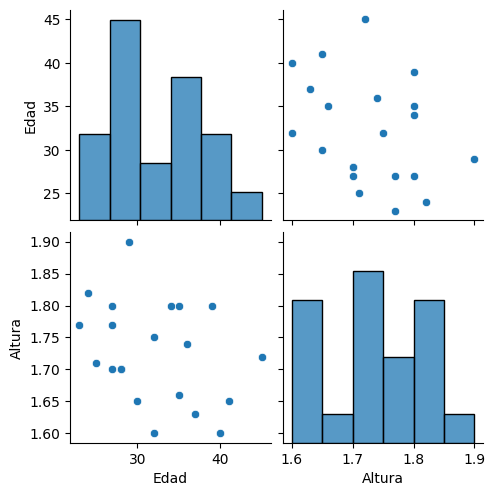

In [12]:
sns.pairplot(df);

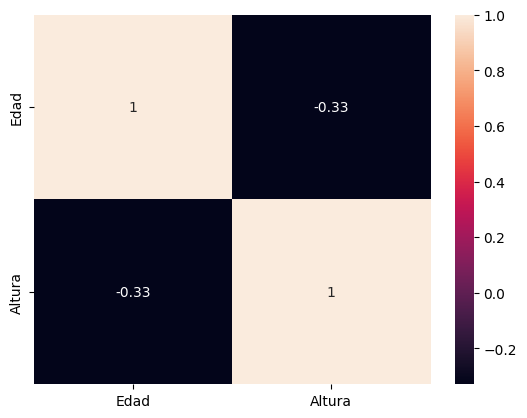

In [29]:
sns.heatmap(df.corr(numeric_only=True),annot=True);

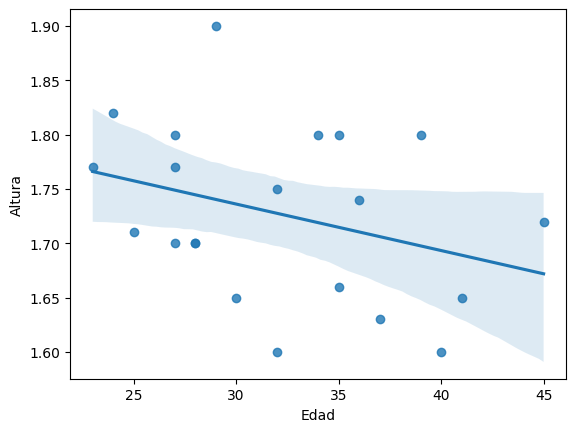

In [37]:
sns.regplot(data=df, x='Edad', y='Altura');

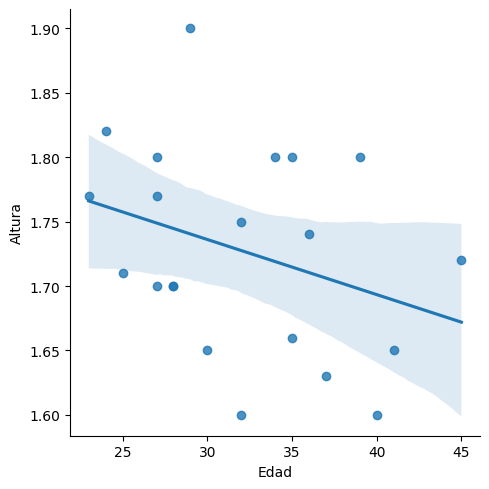

In [49]:
sns.lmplot(data=df, x='Edad', y='Altura');

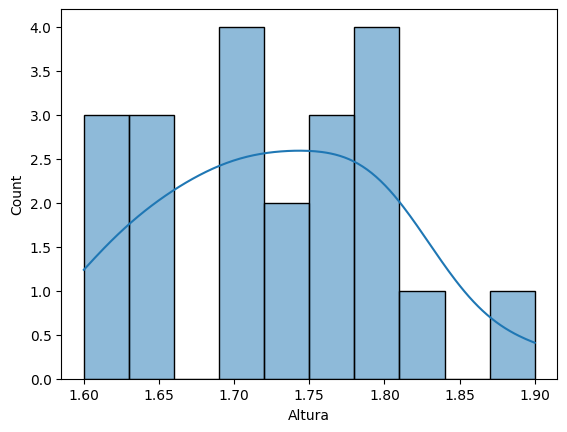

In [13]:
sns.histplot(df['Altura'], kde=True, bins=10);

#### 3. Divide el dataset para el entrenamiento

In [14]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [16]:
x=df[['Edad']]
y=df['Altura']

x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.25, random_state=10)

'''
#Estandarizamos
std_scale=preprocessing.StandardScaler().fit(x_train)
x_train=std_scale.transform(x_train)

std_scale=preprocessing.StandardScaler().fit(x_test)
x_test=std_scale.transform(x_test)
'''

'\n#Estandarizamos\nstd_scale=preprocessing.StandardScaler().fit(x_train)\nx_train=std_scale.transform(x_train)\n\nstd_scale=preprocessing.StandardScaler().fit(x_test)\nx_test=std_scale.transform(x_test)\n'

#### 4. Entrena tu modelo

In [17]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [18]:
print(lm.intercept_) # a: valor independiente
print(lm.coef_) #coeficientes

1.8695222482435596
[-0.00404567]


y(Altura) = 1.87 - 0.004 * x1(Edad)
```
x = 0; y = 1.87
x = 1; y = 1.866
x = 2; y = 1.862
x = 40; y = 1.71
```

In [19]:
coef_df=pd.DataFrame(lm.coef_,
                     x.columns,
                     columns=['Coeficientes'])
coef_df

,Coeficientes
Edad,-0.004046


#### 5. Obtén predicciones con el test

In [24]:
x_test

,Edad
14,23
5,27
2,35
11,30
7,32
18,27


In [25]:
y_test

14    1.77
5     1.80
2     1.66
11    1.65
7     1.60
18    1.77
Name: Altura, dtype: float64

In [29]:
predictions=lm.predict(x_test)
print(x_test)
print('-'*100)
print(y_test)

    Edad
14    23
5     27
2     35
11    30
7     32
18    27
----------------------------------------------------------------------------------------------------
14    1.77
5     1.80
2     1.66
11    1.65
7     1.60
18    1.77
Name: Altura, dtype: float64


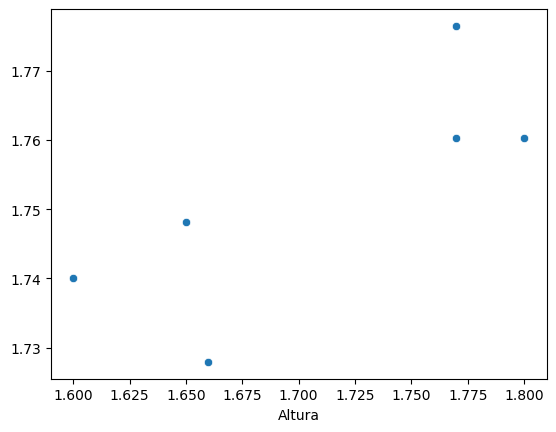

In [27]:
sns.scatterplot(x=y_test, y=predictions);

#### 6. Evalúa tu modelo

Para que el modelo de regresion lineal sea viable los residuos tienen que mostrar una distribucion normal. En este caso es evidente (mirar siguiente grafica) que no lo muestran. Por lo tanto, no es adecuado utilizar algoritmos de regresion lineal.

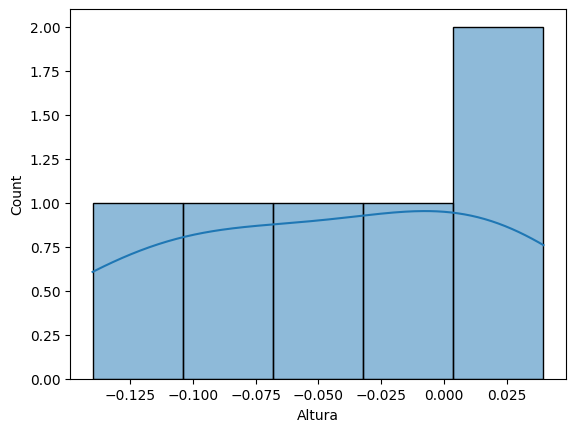

In [48]:
sns.histplot((y_test-predictions),kde=True, bins=5);

Puntuacion de nuestro modelo:

In [40]:
lm.score(x_test,y_test) #del 0 al 1

-0.06254942765180171

Analisis de errores:

In [39]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions)) #media de los errores en valor absoluto
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, predictions))  #te da de 0 a 1 el porcentaje del error
print('MSE:', metrics.mean_squared_error(y_test, predictions), '[m^2]') #No se suele utilizar. Calcula los errores al cuadrado.
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)), '[m]') #El que nos aporta la mayor prespectiva. Es la raiz cuadrada del MSE

MAE: 0.06033840749414521
MAPE: 0.03652442489947345
MSE: 0.00592961611153464 [m^2]
RMSE: 0.07700400062032257 [m]


Podemos calcular a MANO la MAE:

In [30]:
df_eval=pd.DataFrame(x_test)
df_eval['Predicciones']=predictions
df_eval['Valor real']=y_test
df_eval['Error']=abs(df_eval['Predicciones']-df_eval['Valor real'])
df_eval

,Edad,Predicciones,Valor real,Error
14,23,1.776472,1.77,0.006472
5,27,1.760289,1.80,0.039711
2,35,1.727924,1.66,0.067924
11,30,1.748152,1.65,0.098152
7,32,1.740061,1.60,0.140061
18,27,1.760289,1.77,0.009711


In [32]:
np.sum(df_eval['Error'])/len(df_eval)

0.06033840749414521

#### 7. Representa tus predicciones en una gráfica.

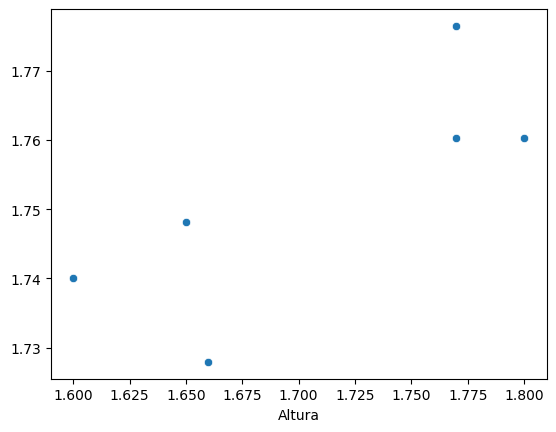

In [36]:
sns.scatterplot(x=y_test, y=predictions);

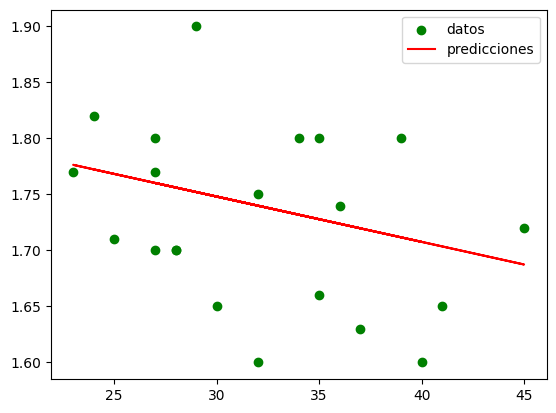

In [45]:
plt.scatter(df['Edad'], df['Altura'], color='g', label='datos')
plt.plot(df['Edad'], lm.predict(x), color='r', label='predicciones')
plt.legend();